<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Brusselator" data-toc-modified-id="Brusselator-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Brusselator</a></span><ul class="toc-item"><li><span><a href="#Brusselator-used-by-arxiv.1804.01080" data-toc-modified-id="Brusselator-used-by-arxiv.1804.01080-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Brusselator used by <a href="https://arxiv.org/abs/1804.01080" target="_blank">arxiv.1804.01080</a></a></span><ul class="toc-item"><li><span><a href="#Determistic-and-stochastic-simulations" data-toc-modified-id="Determistic-and-stochastic-simulations-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Determistic and stochastic simulations</a></span><ul class="toc-item"><li><span><a href="#Effcts-of-different-free-energy-difference-$\mu$" data-toc-modified-id="Effcts-of-different-free-energy-difference-$\mu$-1.1.1.1"><span class="toc-item-num">1.1.1.1&nbsp;&nbsp;</span>Effcts of different free energy difference $\mu$</a></span></li><li><span><a href="#Effcts-of-different-volume-size-$v$" data-toc-modified-id="Effcts-of-different-volume-size-$v$-1.1.1.2"><span class="toc-item-num">1.1.1.2&nbsp;&nbsp;</span>Effcts of different volume size $v$</a></span></li><li><span><a href="#Effcts-of-different-time-steps-$N_t$" data-toc-modified-id="Effcts-of-different-time-steps-$N_t$-1.1.1.3"><span class="toc-item-num">1.1.1.3&nbsp;&nbsp;</span>Effcts of different time steps $N_t$</a></span></li><li><span><a href="#Stoachastic-Simulation" data-toc-modified-id="Stoachastic-Simulation-1.1.1.4"><span class="toc-item-num">1.1.1.4&nbsp;&nbsp;</span>Stoachastic Simulation</a></span></li><li><span><a href="#PCA-to-seperate-two-components" data-toc-modified-id="PCA-to-seperate-two-components-1.1.1.5"><span class="toc-item-num">1.1.1.5&nbsp;&nbsp;</span>PCA to seperate two components</a></span></li></ul></li></ul></li><li><span><a href="#Brusselator-used-by-Nature-Communications-9.1-(2018):-1434." data-toc-modified-id="Brusselator-used-by-Nature-Communications-9.1-(2018):-1434.-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Brusselator used by <a href="https://www.nature.com/articles/s41467-018-03826-4" target="_blank">Nature Communications 9.1 (2018): 1434.</a></a></span><ul class="toc-item"><li><span><a href="#Determistic-and-stochastic-simulations" data-toc-modified-id="Determistic-and-stochastic-simulations-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Determistic and stochastic simulations</a></span><ul class="toc-item"><li><span><a href="#PCA-to-seperate-two-components" data-toc-modified-id="PCA-to-seperate-two-components-1.2.1.1"><span class="toc-item-num">1.2.1.1&nbsp;&nbsp;</span>PCA to seperate two components</a></span></li><li><span><a href="#Power-Spectrum-for-deterministic-simulation" data-toc-modified-id="Power-Spectrum-for-deterministic-simulation-1.2.1.2"><span class="toc-item-num">1.2.1.2&nbsp;&nbsp;</span>Power Spectrum for deterministic simulation</a></span></li><li><span><a href="#Power-Spectrum-for-stochastic-simulation" data-toc-modified-id="Power-Spectrum-for-stochastic-simulation-1.2.1.3"><span class="toc-item-num">1.2.1.3&nbsp;&nbsp;</span>Power Spectrum for stochastic simulation</a></span></li><li><span><a href="#Power-Spectrum-for-stochastic-simulation-in-different-volume" data-toc-modified-id="Power-Spectrum-for-stochastic-simulation-in-different-volume-1.2.1.4"><span class="toc-item-num">1.2.1.4&nbsp;&nbsp;</span>Power Spectrum for stochastic simulation in different volume</a></span></li><li><span><a href="#Power-Spectrum-for-stochastic-simulation-in-different-volume" data-toc-modified-id="Power-Spectrum-for-stochastic-simulation-in-different-volume-1.2.1.5"><span class="toc-item-num">1.2.1.5&nbsp;&nbsp;</span>Power Spectrum for stochastic simulation in different volume</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Test-Clust-simulation" data-toc-modified-id="Test-Clust-simulation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Test Clust simulation</a></span><ul class="toc-item"><li><span><a href="#Determinstic" data-toc-modified-id="Determinstic-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Determinstic</a></span></li><li><span><a href="#Stochastic" data-toc-modified-id="Stochastic-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Stochastic</a></span></li></ul></li></ul></div>

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
from scipy.integrate import odeint
import pylab as plt
import time
import re
import glob, os
from sklearn.decomposition import PCA
from Oscillation_lib.Brusselator_lib import *
from Oscillation_lib.Brusselator_cython import Brusselator_loopProgress
from Oscillation_lib.Brusselator_cython import Brusse_Barato_loopProgress
from Oscillation_lib.Oscillation_plot import color20
tableau20=color20()

In [6]:
from Oscillation_lib.Brusselator_lib import *

# Brusselator 
## Brusselator used by [arxiv.1804.01080](https://arxiv.org/abs/1804.01080)
<img src="image_note/Brusselator_B.png">
### Determistic and stochastic simulations

#### Effcts of different free energy difference $\mu$

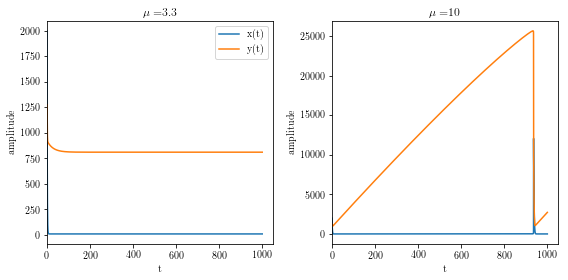

In [33]:
v =1000.0
mu=10;
k1=0.1;
k_1=1.;
k2=0.1;
k3=1.;
k_3=1.;
k_2=10**(-mu)*k_1*k2/k1;
a = 0.1*v; 
b = 0.3*v;
t_scale=1.;
k1, k2, k3, k_1, k_2, k_3=t_scale*k1, t_scale*k2,t_scale*k3, t_scale*k_1, t_scale*k_2, t_scale*k_3
def Brusse_Barato(Y, t,mu):
    x, y = Y
    k_2=np.exp(-mu)*k_1*k2/k1;
    dYdt = np.array([a*k1-k_1*x+k3*(x**2)*y/v**2-k_3*(x**3)/v**2, k2*b-k_2*y+k_3*(x**3)/v**2-k3*(x**2)*y/v**2])
    return dYdt
t_f=20000
N_t=10;
t = np.linspace(0, t_f, N_t*t_f)
Y0 = [2*v, 1*v] # the intials 

t0=1000*N_t
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
fig, ax = plt.subplots(1,2, figsize=(8, 4))
axs = ax.ravel()
i=0
mu_list=[3.3,10]
for ax, mu in zip(axs, mu_list):
    sol = odeint(Brusse_Barato, Y0, t, args=(mu,))
    ax.plot(t[0:t0], sol[0:t0, 0], label='x(t)')
    ax.plot(t[0:t0], sol[0:t0, 1], label='y(t)')
    ax.set_xlim(left=0)
    ax.set_title(r"$\displaystyle\mu=$"+str(mu))
    if i==0:
        ax.legend(loc='best')
    i=i+1    
    ax.set_xlabel('t')
    ax.set_ylabel('amplitude')
plt.tight_layout()    
fig.savefig('Brusselator_Figures//Brusse_Barato_mu_determinstic.pdf',dpi=100)
plt.show()

#### Effcts of different volume size $v$

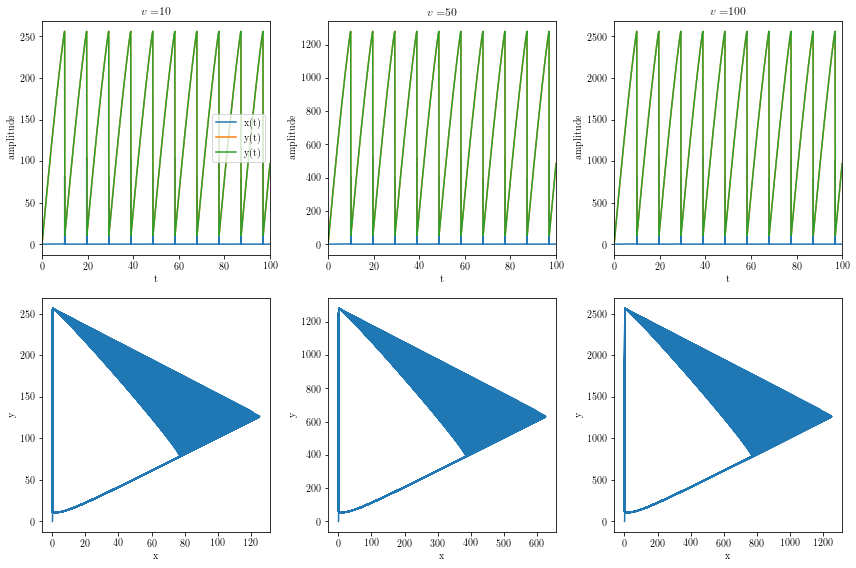

In [42]:
v =10.0
mu=4;
k1=0.1;
k_1=1.;
k2=0.1;
k3=1.;
k_3=1.;
k_2=k_1*k2/k1;
a = 0.1*v; 
b = 0.3*v;
t_scale=100;
k1, k2, k3, k_1, k_2, k_3=t_scale*k1, t_scale*k2,t_scale*k3, t_scale*k_1, t_scale*k_2, t_scale*k_3
def Brusse_Barato(Y, t, a, b,k1, k2, k3, k_1, k_2, k_3, mu, v):
    x, y = Y
    dYdt = np.array([a*k1-k_1*x+k3*(x**2)*y/v**2-k_3*(x**3)/v**2, k2*b-k_2*y+k_3*(x**3)/v**2-k3*(x**2)*y/v**2])
    return dYdt
t_f=2000
N_t=100;
t = np.linspace(0, t_f, N_t*t_f)
Y0 = [v, v] # the intials 

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
fig, ax = plt.subplots(2,3, figsize=(12, 8))
axs = ax.ravel()
i=0
v_list=[10,50,100]
for ax, v in zip(axs[:3], v_list):
    a = 0.1*v; 
    b = 0.3*v;
    Y0 = [0, 0]
    sol = odeint(Brusse_Barato, Y0, t, args=(a, b,k1, k2, k3, k_1, 10**(-mu)*k_1*k2/k1, k_3, mu, v))
    ax.plot(t[:], sol[:, 0], label='x(t)')
    ax.plot(t[:], sol[:, 1], label='y(t)')
    ax.plot(t[:], sol[:, 1], label='y(t)')
    ax.set_xlim([0,100])
    ax.set_title(r"$\displaystyle v=$"+str(v))
    if i==0:
        ax.legend(loc='best')   
    ax.set_xlabel('t')
    ax.set_ylabel('amplitude')
    axs[i+3].plot(sol[:, 0], sol[:, 1])
    axs[i+3].set_xlabel('x')
    axs[i+3].set_ylabel('y')
    i=i+1    
plt.tight_layout()    
fig.savefig('Brusselator_Figures//Brusse_Barato_volume_determinstic.pdf',dpi=100)
plt.show()

#### Effcts of different time steps $N_t$

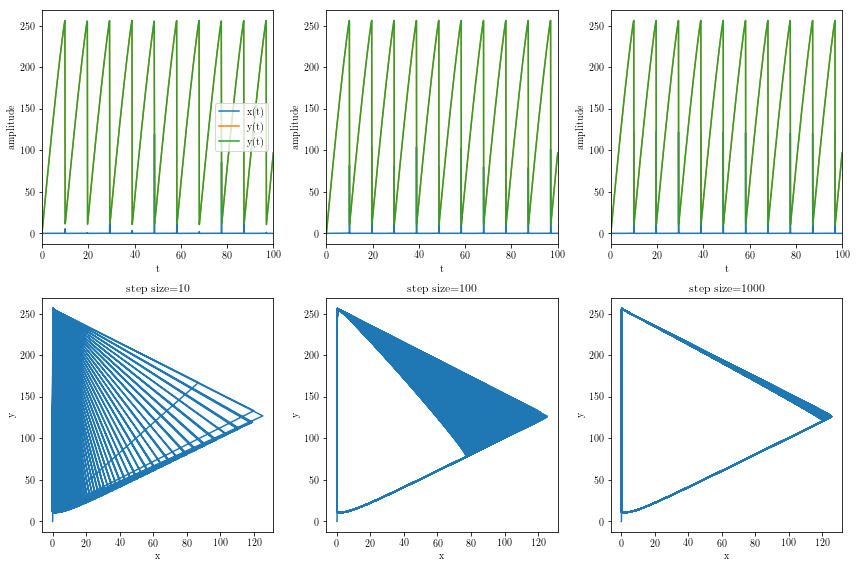

In [20]:
v =10.0
mu=4;
k1=0.1;
k_1=1.;
k2=0.1;
k3=1.;
k_3=1.;
k_2=k_1*k2/k1;
a = 0.1*v; 
b = 0.3*v;
t_scale=100;
k1, k2, k3, k_1, k_2, k_3=t_scale*k1, t_scale*k2,t_scale*k3, t_scale*k_1, t_scale*k_2, t_scale*k_3
def Brusse_Barato(Y, t, a, b,k1, k2, k3, k_1, k_2, k_3, mu, v):
    x, y = Y
    dYdt = np.array([a*k1-k_1*x+k3*(x**2)*y/v**2-k_3*(x**3)/v**2, k2*b-k_2*y+k_3*(x**3)/v**2-k3*(x**2)*y/v**2])
    return dYdt
t_f=2000
N_t=100;
t = np.linspace(0, t_f, N_t*t_f)
Y0 = [v, v] # the intials 

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
fig, ax = plt.subplots(2,3, figsize=(12, 8))
axs = ax.ravel()
i=0
N_t_list=[10,100,1000]
for ax, N_t in zip(axs[:3], N_t_list):
    a = 0.1*v; 
    b = 0.3*v;
    Y0 = [0, 0]
    t = np.linspace(0, t_f, N_t*t_f)
    sol = odeint(Brusse_Barato, Y0, t, args=(a, b,k1, k2, k3, k_1, 10**(-mu)*k_1*k2/k1, k_3, mu, v))
    ax.plot(t[:], sol[:, 0], label='x(t)')
    ax.plot(t[:], sol[:, 1], label='y(t)')
    ax.plot(t[:], sol[:, 1], label='y(t)')
    ax.set_xlim([0,100])
    
    if i==0:
        ax.legend(loc='best')   
    ax.set_xlabel('t')
    ax.set_ylabel('amplitude')
    axs[i+3].set_title(r"step size="+str(N_t))
    axs[i+3].plot(sol[:, 0], sol[:, 1])
    axs[i+3].set_xlabel('x')
    axs[i+3].set_ylabel('y')
    i=i+1    
plt.tight_layout()    
fig.savefig('Brusselator_Figures//Brusse_Barato_stepsize_determinstic.pdf',dpi=100)
plt.show()

#### Stoachastic Simulation

/Users/wenpingcui/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:20: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.


start stochastic simulation
0.01
('stochastic finished', 65.1377260684967)


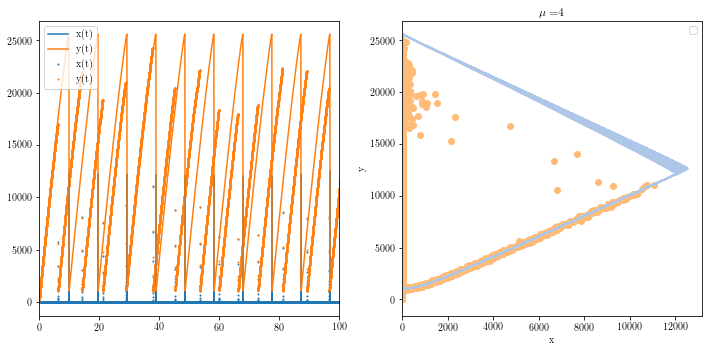

In [48]:
v =1000.0
mu=4;
t_scale=100;
k1=0.1;
k_1=1.;
k2=0.1;
k3=1.;
k_3=1.;
k_2=10**(-mu)*k_1*k2/k1;
a = 0.1*v; 
b = 0.3*v;
k1, k2, k3, k_1, k_2, k_3=t_scale*k1, t_scale*k2,t_scale*k3, t_scale*k_1, t_scale*k_2, t_scale*k_3
par = np.array([a, b, k1, k2, k3, k_1, k_2, k_3])
def Brusse_Barato(Y, t,par, v):
    [a, b, k1, k2, k3, k_1, k_2, k_3]=par
    x, y = Y
    dYdt = np.array([a*k1-k_1*x+k3*(x**2)*y/v**2-k_3*(x**3)/v**2, k2*b-k_2*y+k_3*(x**3)/v**2-k3*(x**2)*y/v**2])
    return dYdt
t_f=1000.;N_t=1000.*t_f;
T_d = np.linspace(0, t_f, N_t)
Y0 = [0., 0.] # the intials 
sol = odeint(Brusse_Barato, Y0, T_d, args=(par,v))
xt_d=sol[:, 0]; yt_d=sol[:, 1]
print ('start stochastic simulation')
step=100.0
Duration =1000.0
numberofrealisations=int(Duration*step);

par = np.array([a, b, k1, k2, k3, k_1, k_2, k_3])
par_ini = np.array([int(0),int(0),v, step])
win_threshold1, win_threshold2 = int(np.mean(xt_d))+1, int(np.mean(yt_d));
filename1 = 'Brusselator_data/'+'Brusse_Barato_Data'+'mu_'+str(mu)+'_size_'+str(v)+'_.csv'
filename2 = 'Brusselator_data/'+'Brusse_Barato_FPT'+'mu_'+str(mu)+'_size_'+str(v)+'_.csv'
filename3 = 'Brusselator_data/'+'Brusse_Barato_FPTDirect'+'mu_'+str(mu)+'_size_'+str(v)+'_.csv'
time0 =time.time()
Brusse_Barato_loopProgress(filename1,filename2,filename3, numberofrealisations,win_threshold1, win_threshold2, par, par_ini)
print ('stochastic finished', time.time()-time0)

df1=pd.read_csv(filename1, sep=',')
T_s=df1[df1.keys()[0]].values
keys= df1.keys()
xt_s, yt_s = df1[df1.keys()[1]].values, df1[df1.keys()[2]].values


plt.rc('text', usetex=True)
plt.rc('font', family='serif')
fig, axs = plt.subplots(1,2,figsize=(10, 5))
ax=axs[0]
ax.plot(T_d, xt_d, label='x(t)')
ax.plot(T_d, yt_d, label='y(t)')
ax.scatter(T_s, xt_s, label='x(t)',s=1)
ax.scatter(T_s, yt_s, label='y(t)',s=1)
ax.set_xlim([0,100])
ax.legend()

ax=axs[1]
ax.plot(xt_d, yt_d, c=tableau20[1], linestyle='dashed')
ax.scatter(xt_s, yt_s,c=tableau20[3]) 
ax.set_xlim(left=0)
ax.set_title(r"$\displaystyle\mu=$"+str(mu))
ax.legend(loc='best')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.tight_layout()    
fig_name='Brusselator_Figures/Brusse_Barato_determinstic_stcho_'+'mu_'+str(mu)+'_size_'+str(v)+'.pdf'
fig.savefig(fig_name,dpi=100)
plt.show()

#### PCA to seperate two components

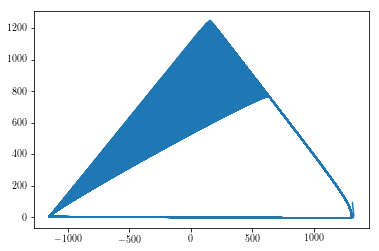

In [38]:
v =100.0
mu=4;
k1=0.1;
k_1=1.;
k2=0.1;
k3=1.;
k_3=1.;
k_2=k_1*k2/k1;
a = 0.1*v; 
b = 0.3*v;
t_scale=100;
k1, k2, k3, k_1, k_2, k_3=t_scale*k1, t_scale*k2,t_scale*k3, t_scale*k_1, t_scale*k_2, t_scale*k_3
def Brusse_Barato(Y, t, a, b,k1, k2, k3, k_1, k_2, k_3, mu, v):
    x, y = Y
    dYdt = np.array([a*k1-k_1*x+k3*(x**2)*y/v**2-k_3*(x**3)/v**2, k2*b-k_2*y+k_3*(x**3)/v**2-k3*(x**2)*y/v**2])
    return dYdt
t_f=2000
N_t=100;
t = np.linspace(0, t_f, N_t*t_f)
Y0 = [v, v] # the intials 
sol = odeint(Brusse_Barato, Y0, t, args=(a, b,k1, k2, k3, k_1, 10**(-mu)*k_1*k2/k1, k_3, mu, v))
Y = np.c_[sol[:,0],sol[:,1]]
pca = PCA(n_components=2)
new_sol=pca.fit_transform(Y)
pca.fit(Y)
pca_score = pca.explained_variance_ratio_
V = pca.components_
plt.plot(new_sol[:, 0], new_sol[:, 1])
plt.show()

## Brusselator used by [Nature Communications 9.1 (2018): 1434.](https://www.nature.com/articles/s41467-018-03826-4)
<img src="image_note/Brusselator_cao.png">

### Determistic and stochastic simulations
Several cases that have differnet oscilation period
* case1: $k_2=10$, $k_{-2}=0.5$   
* case2: $k_2=10$, $k_{-2}=0.1$
* case3: $k_2=10$, $k_{-2}=0.0001$
* case4: $k_2=100$, $k_{-2}=0.1$

/Users/wenpingcui/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:20: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.


start stochastic simulation
('stochastic finished', 0.8273608684539795)
[ 20.   5.   2. ...,   1.   1.   1.]


No handlers could be found for logger "matplotlib.legend"


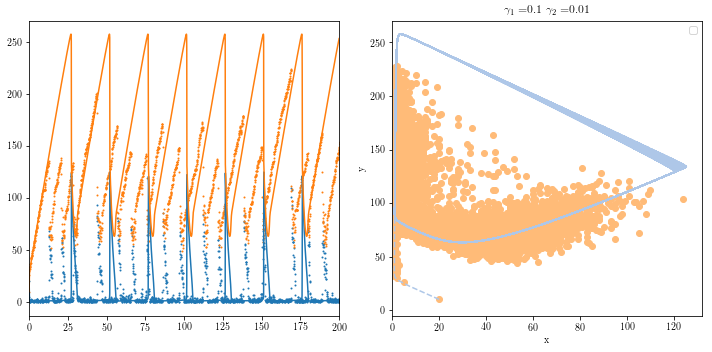

In [15]:
v =10.0
gamma1=0.1;
gamma2=0.01;
k1=1.;
k_1=1.;
k2=1.;
k3=1.;
k_3=1.;
k_2=1.;
a = 1.*v; 
b = 1.*v;
d = 1.*v;
def Brusse(Y, t, gamma1, gamma2,v):
    k2=1./gamma1;
    k_2=1.*gamma2;
    x, y = Y
    dYdt = np.array([a*k1-k_1*x+k_2*d*y/v-k2*b*x/v+k3*x**2*y/v**2-k_3*x**3/v**2, k2*b*x/v-k_2*d*y/v+k_3*x**3/v**2-k3*x**2*y/v**2])
    return dYdt
t_f=2000.;N_t=10;
T_d = np.linspace(0, t_f, N_t*t_f)
Y0 = [2*v, 1*v] # the intials 
t0=int(100/t_f*N_t)
sol = odeint(Brusse, Y0, T_d, args=(gamma1, gamma2, v))
xt_d=sol[:, 0]; yt_d=sol[:, 1]


print ('start stochastic simulation')
step=10.0
Duration =2000.0
numberofrealisations=int(Duration*step);
k2=1./gamma1;
k_2=1.*gamma2;
par = np.array([a, b, d, k1, k2, k3, k_1, k_2, k_3])
par_ini = np.array([int(2*v),int(v),v, step])
win_threshold1, win_threshold2 = int(np.mean(xt_d))+1, int(np.mean(yt_d));
filename1 = 'Brusselator_data/'+'Data'+'gamma1_'+str(gamma1)+'_gamma2_'+str(gamma2)+'_size_'+str(v)+'_.csv'
filename2 = 'Brusselator_data/'+'FPT'+'gamma1_'+str(gamma1)+'_gamma2_'+str(gamma2)+'_size_'+str(v)+'_.csv'
filename3 = 'Brusselator_data/'+'FPTDirect'+'gamma1_'+str(gamma1)+'_gamma2_'+str(gamma2)+'_size_'+str(v)+'_.csv'
time0 =time.time()
Brusselator_loopProgress(filename1,filename2,filename3, numberofrealisations,win_threshold1, win_threshold2, par, par_ini)
print ('stochastic finished', time.time()-time0)

df1=pd.read_csv(filename1, sep=',')
T_s=df1[df1.keys()[0]].values
keys= df1.keys()
xt_s, yt_s = df1[df1.keys()[1]].values, df1[df1.keys()[2]].values
print (xt_s)

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
fig, axs = plt.subplots(1,2,figsize=(10, 5))
ax=axs[0]

ax.plot(T_d, xt_d, label='x(t)')
ax.plot(T_d, yt_d, label='y(t)')
ax.scatter(T_s, xt_s, label='x(t)',s=1)
ax.scatter(T_s, yt_s, label='y(t)',s=1)
ax.set_xlim([0,200])
ax=axs[1]
ax.plot(xt_d, yt_d, c=tableau20[1], linestyle='dashed')
ax.scatter(xt_s, yt_s,c=tableau20[3]) 
ax.set_xlim(left=0)
ax.set_title(r"$\displaystyle\gamma_1=$"+str(gamma1)+' '+r"$\displaystyle\gamma_2=$"+str(gamma2))
ax.legend(loc='best')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.tight_layout()    
fig_name='Brusselator_Figures/Brusselator_cao'+'gamma1_'+str(gamma1)+'_gamma2_'+str(gamma2)+'_size_'+str(v)+'.pdf'
fig.savefig(fig_name,dpi=100)
plt.show()

#### PCA to seperate two components

('new axis for derterminstic solutions', array([[ 0.40443325, -0.91456752],
       [ 0.91456752,  0.40443325]]))
('new axis for stochastic solutions', array([[ 0.49054612, -0.87141523],
       [ 0.87141523,  0.49054612]]))


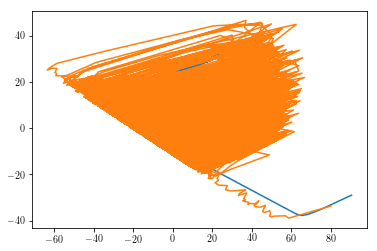

In [27]:
# PCA to deterministic solutions
Y = np.c_[xt_d,yt_d]
pca = PCA(n_components=2)
new_sol=pca.fit_transform(Y)
V = pca.components_
print ('new axis for derterminstic solutions',V)
plt.plot(new_sol[:,0],new_sol[:,1])
# PCA to stochastic solutions
Y = np.c_[xt_s,yt_s]
pca = PCA(n_components=2)
new_sol=pca.fit_transform(Y)
V = pca.components_
print ('new axis for stochastic solutions',V)
plt.plot(new_sol[:,0],new_sol[:,1])
plt.show()

#### Power Spectrum for deterministic simulation

/Users/wenpingcui/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.


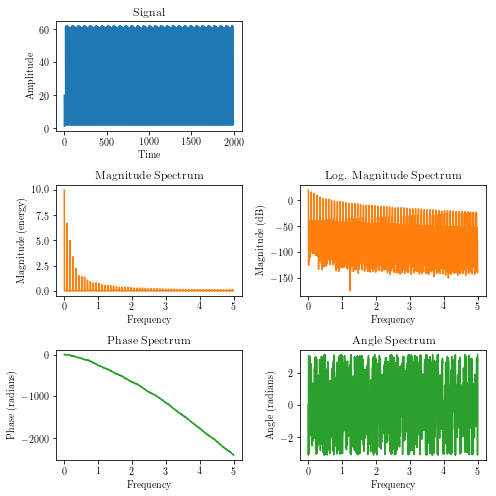

In [37]:
np.random.seed(0)

dt = 1./N_t  # sampling interval
Fs = 1. / dt  # sampling frequency
t = np.linspace(0, t_f, N_t*t_f)


s = xt_d  # the signal

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(7, 7))

# plot time signal:
axes[0, 0].set_title("Signal")
axes[0, 0].plot(t, s, color='C0')
axes[0, 0].set_xlabel("Time")
axes[0, 0].set_ylabel("Amplitude")

# plot different spectrum types:
axes[1, 0].set_title("Magnitude Spectrum")
axes[1, 0].magnitude_spectrum(s, Fs=Fs, color='C1')

axes[1, 1].set_title("Log. Magnitude Spectrum")
axes[1, 1].magnitude_spectrum(s, Fs=Fs, scale='dB', color='C1')

axes[2, 0].set_title("Phase Spectrum ")
axes[2, 0].phase_spectrum(s, Fs=Fs, color='C2')

axes[2, 1].set_title("Angle Spectrum")
axes[2, 1].angle_spectrum(s, Fs=Fs, color='C2')

axes[0, 1].remove()  # don't display empty ax

fig.tight_layout()
plt.show()

#### Power Spectrum for stochastic simulation

/Users/wenpingcui/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.


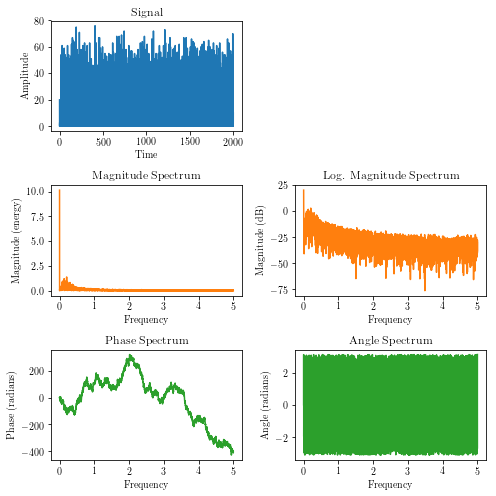

In [40]:
np.random.seed(0)

dt = 1./N_t  # sampling interval
Fs = 1. / dt  # sampling frequency
t = np.linspace(0, t_f, N_t*t_f)


s = xt_s  # the signal

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(7, 7))

# plot time signal:
axes[0, 0].set_title("Signal")
axes[0, 0].plot(t, s, color='C0')
axes[0, 0].set_xlabel("Time")
axes[0, 0].set_ylabel("Amplitude")

# plot different spectrum types:
axes[1, 0].set_title("Magnitude Spectrum")
axes[1, 0].magnitude_spectrum(s, Fs=Fs, color='C1')

axes[1, 1].set_title("Log. Magnitude Spectrum")
axes[1, 1].magnitude_spectrum(s, Fs=Fs, scale='dB', color='C1')

axes[2, 0].set_title("Phase Spectrum ")
axes[2, 0].phase_spectrum(s, Fs=Fs, color='C2')

axes[2, 1].set_title("Angle Spectrum")
axes[2, 1].angle_spectrum(s, Fs=Fs, color='C2')

axes[0, 1].remove()  # don't display empty ax

fig.tight_layout()
plt.show()

#### Power Spectrum for stochastic simulation in different volume

/Users/wenpingcui/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:27: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.


start stochastic simulation
('stochastic finished', 12.833708047866821)


/Users/wenpingcui/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:55: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.


start stochastic simulation
('stochastic finished', 12.724867105484009)
start stochastic simulation
('stochastic finished', 16.088398933410645)


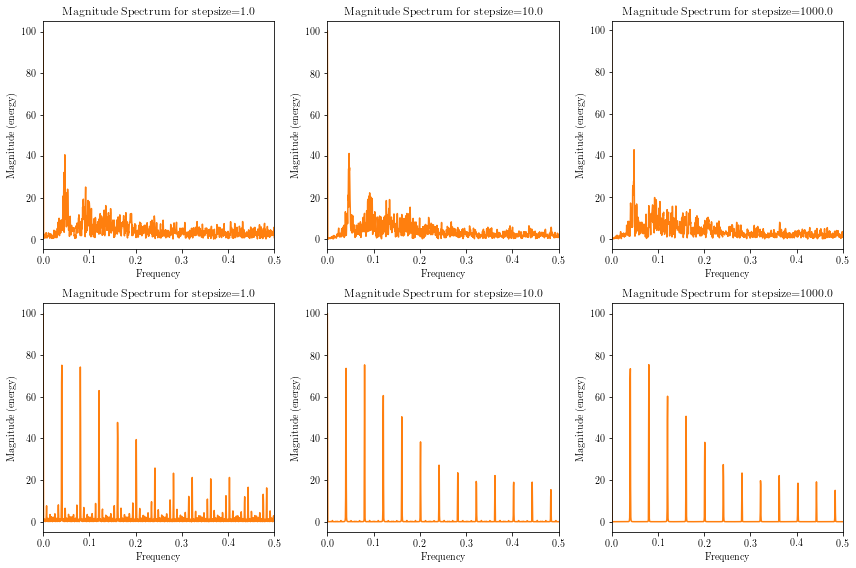

In [2]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
fig, axs = plt.subplots(2,3,figsize=(12, 8))
axs = axs.ravel()
v=100;
N_t_list=[1.,10.,1000.]
i=0;
for ax, N_t in zip(axs[:3], N_t_list):
    gamma1=0.1;
    gamma2=0.01;
    k1=1.;
    k_1=1.;
    k2=1.;
    k3=1.;
    k_3=1.;
    k_2=1.;
    a = 1.*v; 
    b = 1.*v;
    d = 1.*v;
    def Brusse(Y, t, gamma1, gamma2,v):
        k2=1./gamma1;
        k_2=1.*gamma2;
        x, y = Y
        dYdt = np.array([a*k1-k_1*x+k_2*d*y/v-k2*b*x/v+k3*x**2*y/v**2-k_3*x**3/v**2, k2*b*x/v-k_2*d*y/v+k_3*x**3/v**2-k3*x**2*y/v**2])
        return dYdt
    t_f=2000.;
    T_d = np.linspace(0, t_f, N_t*t_f)
    Y0 = [2*v, 1*v] # the intials 
    sol = odeint(Brusse, Y0, T_d, args=(gamma1, gamma2, v))
    xt_d=sol[:, 0]; yt_d=sol[:, 1]
    print ('start stochastic simulation')
    step=N_t
    Duration =2000.0
    numberofrealisations=int(Duration*step);
    k2=1./gamma1;
    k_2=1.*gamma2;
    par = np.array([a, b, d, k1, k2, k3, k_1, k_2, k_3])
    par_ini = np.array([int(2*v),int(v),v, step])
    win_threshold1, win_threshold2 = int(np.mean(xt_d))+1, int(np.mean(yt_d));
    filename1 = 'Brusselator_data/'+'Data'+'gamma1_'+str(gamma1)+'_gamma2_'+str(gamma2)+'_size_'+str(v)+'_.csv'
    filename2 = 'Brusselator_data/'+'FPT'+'gamma1_'+str(gamma1)+'_gamma2_'+str(gamma2)+'_size_'+str(v)+'_.csv'
    filename3 = 'Brusselator_data/'+'FPTDirect'+'gamma1_'+str(gamma1)+'_gamma2_'+str(gamma2)+'_size_'+str(v)+'_.csv'
    time0 =time.time()
    Brusselator_loopProgress(filename1,filename2,filename3, numberofrealisations,win_threshold1, win_threshold2, par, par_ini)
    print ('stochastic finished', time.time()-time0)

    df1=pd.read_csv(filename1, sep=',')
    T_s=df1[df1.keys()[0]].values
    keys= df1.keys()
    xt_s, yt_s = df1[df1.keys()[1]].values, df1[df1.keys()[2]].values

    # plot different spectrum types:
    dt = 1./N_t  # sampling interval
    Fs = 1. / dt  # sampling frequency
    t = np.linspace(0, t_f, N_t*t_f)
    s = xt_s  # the signal
    ax.set_title("Magnitude Spectrum for stepsize="+ str(N_t))
    ax.magnitude_spectrum(s, Fs=Fs, color='C1')
    ax.set_xlim([0,0.5])
    ax=axs[i+3]
    s = xt_d  # the signal
    ax.set_title("Magnitude Spectrum for stepsize="+ str(N_t))
    ax.magnitude_spectrum(s, Fs=Fs, color='C1')
    ax.set_xlim([0,0.5])
    i=i+1
    
fig.tight_layout() 
fig.savefig('Brusselator_spectrum_stepsize.pdf',dpi=100)
plt.show()    

#### Power Spectrum for stochastic simulation in different volume

/Users/wenpingcui/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:27: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.


start stochastic simulation
('stochastic finished', 0.8840649127960205)


/Users/wenpingcui/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:56: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.


start stochastic simulation
('stochastic finished', 12.708620071411133)
start stochastic simulation
('stochastic finished', 145.59848880767822)


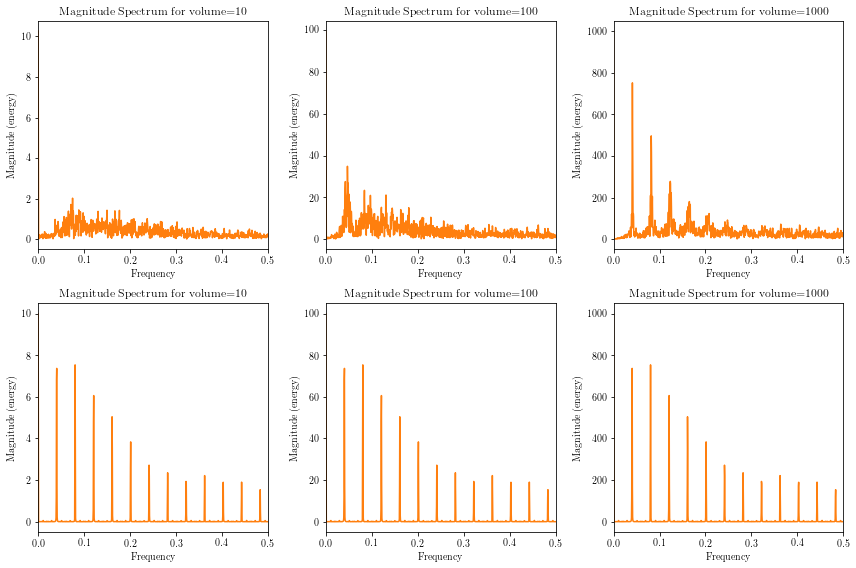

In [58]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
fig, axs = plt.subplots(2,3,figsize=(12, 8))
axs = axs.ravel()
v=10;
v_list=[10,100,1000]
i=0;
for ax, v in zip(axs[:3], v_list):
    gamma1=0.1;
    gamma2=0.01;
    k1=1.;
    k_1=1.;
    k2=1.;
    k3=1.;
    k_3=1.;
    k_2=1.;
    a = 1.*v; 
    b = 1.*v;
    d = 1.*v;
    def Brusse(Y, t, gamma1, gamma2,v):
        k2=1./gamma1;
        k_2=1.*gamma2;
        x, y = Y
        dYdt = np.array([a*k1-k_1*x+k_2*d*y/v-k2*b*x/v+k3*x**2*y/v**2-k_3*x**3/v**2, k2*b*x/v-k_2*d*y/v+k_3*x**3/v**2-k3*x**2*y/v**2])
        return dYdt
    t_f=2000.;N_t=10;
    T_d = np.linspace(0, t_f, N_t*t_f)
    Y0 = [2*v, 1*v] # the intials 
    t0=int(100/t_f*N_t)
    sol = odeint(Brusse, Y0, T_d, args=(gamma1, gamma2, v))
    xt_d=sol[:, 0]; yt_d=sol[:, 1]
    print ('start stochastic simulation')
    step=10.0
    Duration =2000.0
    numberofrealisations=int(Duration*step);
    k2=1./gamma1;
    k_2=1.*gamma2;
    par = np.array([a, b, d, k1, k2, k3, k_1, k_2, k_3])
    par_ini = np.array([int(2*v),int(v),v, step])
    win_threshold1, win_threshold2 = int(np.mean(xt_d))+1, int(np.mean(yt_d));
    filename1 = 'Brusselator_data/'+'Data'+'gamma1_'+str(gamma1)+'_gamma2_'+str(gamma2)+'_size_'+str(v)+'_.csv'
    filename2 = 'Brusselator_data/'+'FPT'+'gamma1_'+str(gamma1)+'_gamma2_'+str(gamma2)+'_size_'+str(v)+'_.csv'
    filename3 = 'Brusselator_data/'+'FPTDirect'+'gamma1_'+str(gamma1)+'_gamma2_'+str(gamma2)+'_size_'+str(v)+'_.csv'
    time0 =time.time()
    Brusselator_loopProgress(filename1,filename2,filename3, numberofrealisations,win_threshold1, win_threshold2, par, par_ini)
    print ('stochastic finished', time.time()-time0)

    df1=pd.read_csv(filename1, sep=',')
    T_s=df1[df1.keys()[0]].values
    keys= df1.keys()
    xt_s, yt_s = df1[df1.keys()[1]].values, df1[df1.keys()[2]].values

    # plot different spectrum types:
    dt = 1./N_t  # sampling interval
    Fs = 1. / dt  # sampling frequency
    t = np.linspace(0, t_f, N_t*t_f)
    s = xt_s  # the signal
    ax.set_title("Magnitude Spectrum for volume="+ str(v))
    ax.magnitude_spectrum(s, Fs=Fs, color='C1')
    ax.set_xlim([0,0.5])
    ax=axs[i+3]
    s = xt_d  # the signal
    ax.set_title("Magnitude Spectrum for volume="+ str(v))
    ax.magnitude_spectrum(s, Fs=Fs, color='C1')
    ax.set_xlim([0,0.5])
    i=i+1
    
fig.tight_layout() 
fig.savefig('Brusselator_spectrum_volume.pdf',dpi=100)
plt.show()    

In [4]:
import numpy as np
10**np.linspace(-3,-10,40)

array([  1.00000000e-03,   6.61474064e-04,   4.37547938e-04,
         2.89426612e-04,   1.91448198e-04,   1.26638017e-04,
         8.37677640e-05,   5.54102033e-05,   3.66524124e-05,
         2.42446202e-05,   1.60371874e-05,   1.06081836e-05,
         7.01703829e-06,   4.64158883e-06,   3.07029063e-06,
         2.03091762e-06,   1.34339933e-06,   8.88623816e-07,
         5.87801607e-07,   3.88815518e-07,   2.57191381e-07,
         1.70125428e-07,   1.12533558e-07,   7.44380301e-08,
         4.92388263e-08,   3.25702066e-08,   2.15443469e-08,
         1.42510267e-08,   9.42668455e-09,   6.23550734e-09,
         4.12462638e-09,   2.72833338e-09,   1.80472177e-09,
         1.19377664e-09,   7.89652287e-10,   5.22334507e-10,
         3.45510729e-10,   2.28546386e-10,   1.51177507e-10,
         1.00000000e-10])

# Test Clust simulation
## Determinstic 

[  1.00000000e+02   3.00000000e+02   1.00000000e+01   1.00000000e+01
   1.00000000e+02   1.00000000e+02   3.35462628e-02   1.00000000e+02]


Oscillation_lib/Brusselator_lib.py:65: RuntimeWarning: divide by zero encountered in divide
  Entropy_pt_d[:]=Entropy_pt_d[:]+(current_d[2*j][:]-current_d[2*j+1][:])*np.log(current_d[2*j][:]/current_d[2*j+1][:])
Oscillation_lib/Brusselator_lib.py:65: RuntimeWarning: invalid value encountered in divide
  Entropy_pt_d[:]=Entropy_pt_d[:]+(current_d[2*j][:]-current_d[2*j+1][:])*np.log(current_d[2*j][:]/current_d[2*j+1][:])


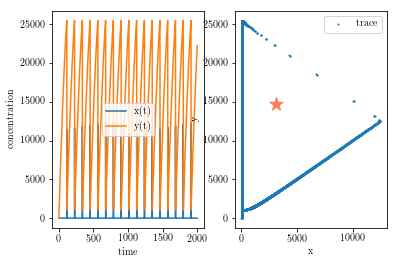

In [16]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from Oscillation_lib.Brusselator_cython import Brusselator_loopProgress
from Oscillation_lib.Brusselator_cython import Brusse_Barato_loopProgress
from Oscillation_lib.Brusselator_lib import Brusselator_simulation
v =1000.0
mu=8;
t_scale=100;
k1=0.1;
k_1=1.;
k2=0.1;
k3=1.;
k_3=1.;
k_2=np.exp(-mu)*k_1*k2/k1;
a = 0.1*v; 
b = 0.3*v;
par=[v, mu, t_scale, k1, k_1, k2, k_2, k3, k_3,a ,b]
Model=Brusselator_simulation(par)
print (Model.par)
dermin_entropy, dermin_period,fig=Model.determinstic_simulation(plot=True)

## Stochastic 

In [17]:
Model.Stochastic_simulation()

0.0335462627903


0

In [9]:
import os, sys

# Open a file
path = '/Users/wenpingcui/Documents/Code_Projects/Clock_Model'
dirs = os.listdir( path )

# This would print all the files and directories
for file in dirs:
   print file

AI_Figures
AI_data
Analyze.ipynb
cython_setup.py
image_note
Brusselator_data
.DS_Store
VarT_D.png
Clock_model_without_feedback.ipynb
Circle_data
AI.py
Paral_simulation
Circle_Figures
Brusselator_Figures
README.md
entropy_Var.png
Version
Circle_entropy
Brusselator.ipynb
AI_lib.py
Clock_model_v6.ipynb
Oscillation_lib
Activator_inhibitor_v4.py
.ipynb_checkpoints
Circle_entropy.py
AI_entropy
Untitled.key
build
.git
Clock_model_v7.ipynb
Circle_v1.py
Clock.xlsx
entropy_D.png
.idea
Clock_model_v5.ipynb


In [8]:
pwd

u'/Users/wenpingcui/Documents/Code_Projects/Clock_Model'